# T1 Preparation for PNA Instructions

In [2]:
import os
import pandas as pd
import sys

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(src_path)

from src import query_engines, dataframe_visualizer

q = query_engines.QueryEngines()

# Exposures since 1st Jan

In [5]:
QUERY_NAME = 'exposures_check.sql' # With sql
START_DATE = "'2025-01-01'"
END_DATE = "'2025-01-20'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q.prepare_query(
    QUERY_NAME
    ,params=params
    ,to_load_file=QUERY_NAME
    ,load_from_to_load_file=None
)

df  = q.query_run_starburst()

# Convert calendar_date to datetime
df['calendar_date'] = pd.to_datetime(df['calendar_date'])

# Add percentages of each variant
df['perc_control_group_ui'] = df['n_control_group_ui'] / (df['n_control_group_ui'] + df['n_variant_ui'])
df['perc_variant_ui'] = df['n_variant_ui'] / (df['n_control_group_ui'] + df['n_variant_ui'])
df['perc_control_group_default'] = df['n_control_group_default'] / (df['n_control_group_default'] + df['n_variant_default'])
df['perc_variant_default'] = df['n_variant_default'] / (df['n_control_group_default'] + df['n_variant_default'])

# Sort by calendar_date
df.sort_values(by='calendar_date', inplace=True)

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/d22eede845e5dcf4f37f9b04de89db1d9f4c6e2fad031d45a0fbf119183fbf7b


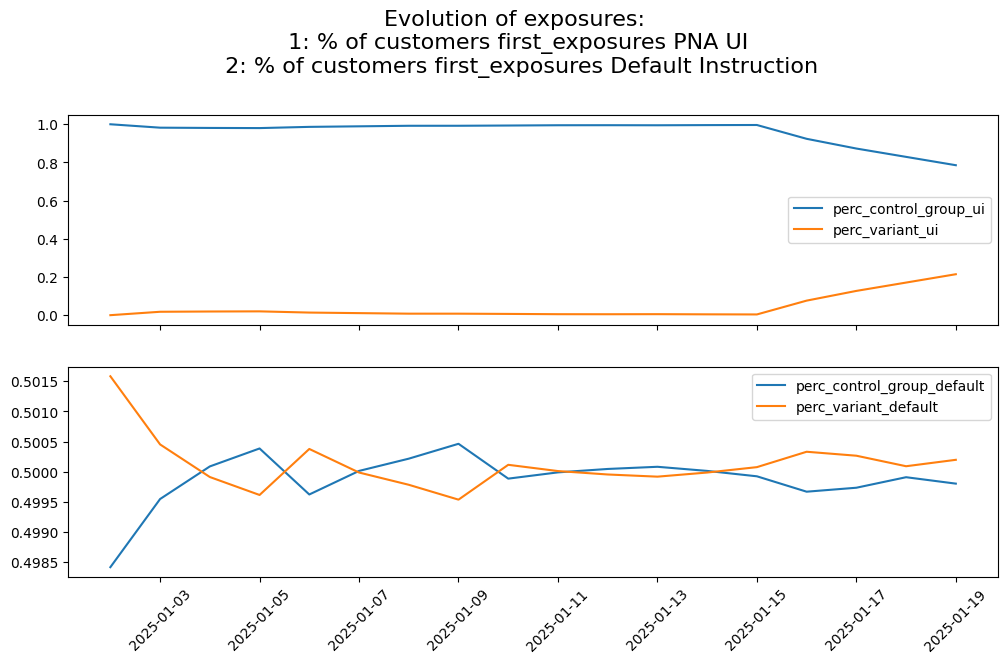

In [6]:
# Filter the dataframe for calendar_dates older than 2025-01-01
cond = df['calendar_date'] > '2025-01-01'

v = dataframe_visualizer.DataFrameVisualizer(df[cond])

plot_params = [
    {
        'plot_type': 'lineplot', 
        'x_column': 'calendar_date', 
        'y_columns': ['perc_control_group_ui', 'perc_variant_ui'],
        'colors': ['blue', 'orange'], # default None
        'legend': True # default True
    },
    {
        'plot_type': 'lineplot', 
        'x_column': 'calendar_date', 
        'y_columns': ['perc_control_group_default', 'perc_variant_default'],
        'colors': ['blue', 'orange'], # default None
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 2, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    # 'x_limits': [(0,100),(0,200)], # default None
    # 'y_limits': [(0,100),(0,200)], # default None
    # 'log_axis': ['x','y','both'], # default None
    'title': 'Evolution of exposures: \n 1: % of customers first_exposures PNA UI \n 2: % of customers first_exposures Default Instruction' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

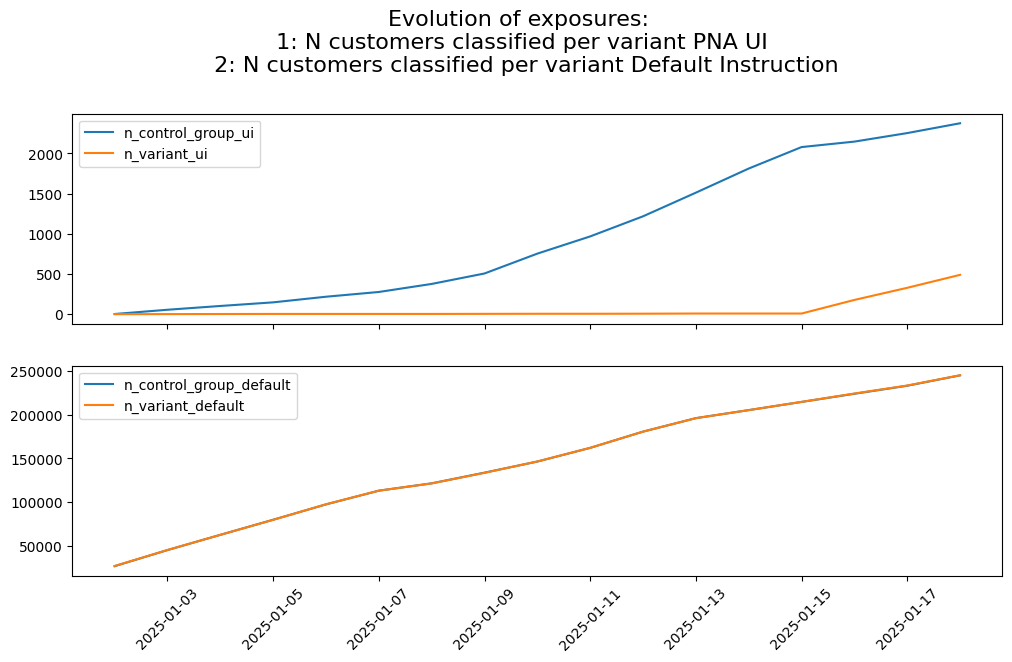

In [8]:
# Filter the dataframe for calendar_dates older than 2025-01-01
cond = df['calendar_date'] > '2025-01-01'
cond2 = df['calendar_date'] < '2025-01-19'

v = dataframe_visualizer.DataFrameVisualizer(df[cond & cond2])

plot_params = [
    {
        'plot_type': 'lineplot', 
        'x_column': 'calendar_date', 
        'y_columns': ['n_control_group_ui', 'n_variant_ui'],
        'colors': ['blue', 'orange'], # default None
        'legend': True # default True
    },
    {
        'plot_type': 'lineplot', 
        'x_column': 'calendar_date', 
        'y_columns': ['n_control_group_default', 'n_variant_default'],
        'colors': ['blue', 'orange'], # default None
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 2, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    # 'x_limits': [(0,100),(0,200)], # default None
    # 'y_limits': [(0,100),(0,200)], # default None
    # 'log_axis': ['x','y','both'], # default None
    'title': 'Evolution of exposures: \n 1: N customers classified per variant PNA UI \n 2: N customers classified per variant Default Instruction' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

# Exposures since the changes

In [60]:
QUERY_NAME = 'exposures_check.sql' # With sql
START_DATE = "'2025-01-15'" # The date we change the configuration was Tuesday 2025-01-14
END_DATE = "'2025-01-19'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q.prepare_query(
    QUERY_NAME
    ,params=params
    ,to_load_file=QUERY_NAME
    ,load_from_to_load_file=None
)

df  = q.query_run_starburst()

# Add percentages of each variant
df['perc_control_group_ui'] = df['n_control_group_ui'] / (df['n_control_group_ui'] + df['n_variant_ui'])
df['perc_variant_ui'] = df['n_variant_ui'] / (df['n_control_group_ui'] + df['n_variant_ui'])
df['perc_control_group_default'] = df['n_control_group_default'] / (df['n_control_group_default'] + df['n_variant_default'])
df['perc_variant_default'] = df['n_variant_default'] / (df['n_control_group_default'] + df['n_variant_default'])

# Edit calendar_date so it shows as YYYY-MM-DD
df['calendar_date'] = pd.to_datetime(df['calendar_date']).dt.strftime('%Y-%m-%d')

# Sort by calendar_date
df.sort_values(by='calendar_date', inplace=True)

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/22cf8e507e871412fed195c6589281d39718a749f474cc9fcac924af8d5c6816


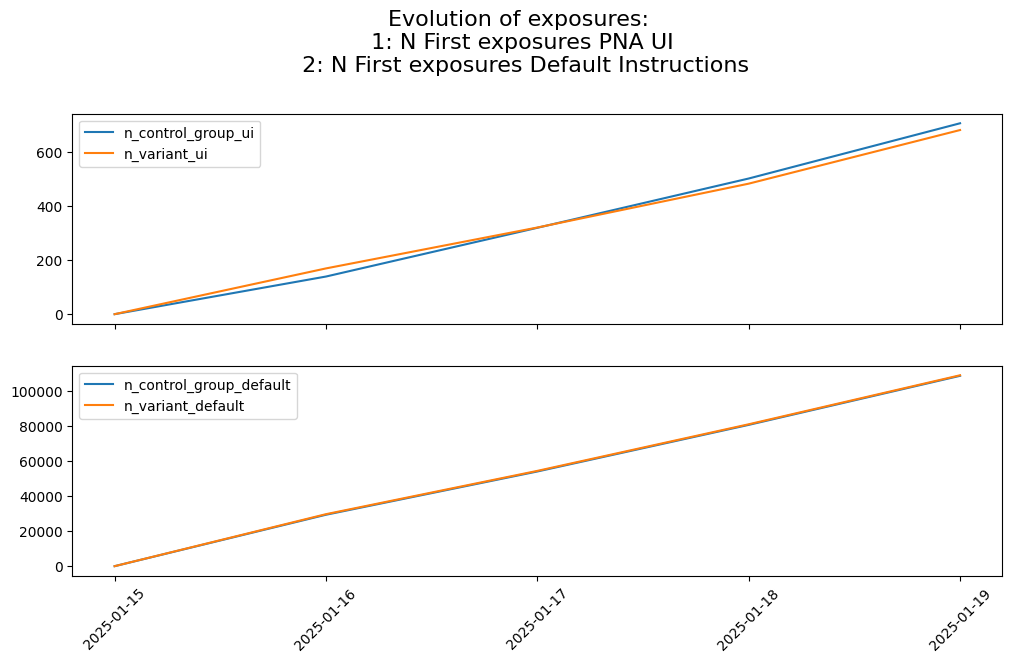

In [62]:
v = dataframe_visualizer.DataFrameVisualizer(df)

plot_params = [
    {
        'plot_type': 'lineplot', 
        'x_column': 'calendar_date', 
        'y_columns': ['n_control_group_ui', 'n_variant_ui'],
        'colors': ['blue', 'orange'], # default None
        'legend': True # default True
    },
    {
        'plot_type': 'lineplot', 
        'x_column': 'calendar_date', 
        'y_columns': ['n_control_group_default', 'n_variant_default'],
        'colors': ['blue', 'orange'], # default None
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 2, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    # 'x_limits': [(0,100),(0,200)], # default None
    # 'y_limits': [(0,1),(0,1)], # default None
    # 'log_axis': ['x','y','both'], # default None
    'title': 'Evolution of exposures: \n 1: N First exposures PNA UI \n 2: N First exposures Default Instructions' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)

# T1 query

In [87]:
QUERY_NAME = 't1.sql' # With sql
START_DATE = "'2024-12-15'"
END_DATE = "'2025-01-15'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q.prepare_query(
    QUERY_NAME
    ,params=params
    ,to_load_file=QUERY_NAME
    ,load_from_to_load_file=None
)

df  = q.query_run_starburst()

# Convert calendar_date to datetime
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])


# Sort by calendar_date
df.sort_values(by='p_creation_date', inplace=True)

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/8a8c94b7a213a4b3cc2fe1ed86eab9e41288285986bc0e8ccc5181923a6b393c
